Assignment 2 - Questions
Use the merged data frame from Assignment 1 for this assignment This Assignment focuses on data preprocessing and model building. Continue with the datasets loaded in Assignment 1 (or reload with same steps and create merged data frame) and Make a stratified 80-20 split based on target to ensure there are no biases in the dataset. Predict the "total_cases" using a stochastic gradient descent regressor. Calculate the Root Mean Square Error. Also, plot Learning Curve for the model. Provide your intepretations based on these metrics.

Import the required libraries
Make an 80-20 stratified split based on the target data
Preprocess the data (Encode the categorical features and Standardize the numerical features)
Build a stochastic gradient descent regressor, train the model
Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.
List the hyper-parameters that can be tuned in SGD. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. 
Plot Learning curve and provide insights
Create a submission file which has predictions for both cities in the submission format prescribed by the contest at the link https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/
Optional: Submit your predictions to the contest. You will get a submission score. Update it here. As you improve your model in next assignments, you can try to improve this score.
Submit the following for this assignment:

.ipynb and .html formats of Jupyter notebook code with outputs and
the submission_format.csv with your predictions

_import the data from assignment 1 with merged dataset_

In [781]:
import pandas as pd
df=pd.read_csv("df_merged.csv")
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


_Removing outliers from the dataset using first and third quantile, any datapoint 1.5 Standard deviation above third quantile and below first quantile has been removed_

In [782]:
Q1=df['total_cases'].quantile(0.25)
Q3=df['total_cases'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
df_out=pd.DataFrame()
df_out=df[(df['total_cases']<(Q1-1.5*IQR))|(df['total_cases']>(Q3+1.5*IQR))]
print(df_out.shape)

23.0
(124, 25)


In [783]:
df_noout=df[~((df['total_cases']<(Q1-1.5*IQR))|(df['total_cases']>(Q3+1.5*IQR)))]
df_noout.shape

(1332, 25)

In [784]:
df_noout=df_noout.drop(columns=['week_start_date','weekofyear'])
df_noout.head()

,city,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,re_an_dew_point_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


_Checking the maximum datapoints around which value by using histogram, so that we can create the stratified split accordingly_

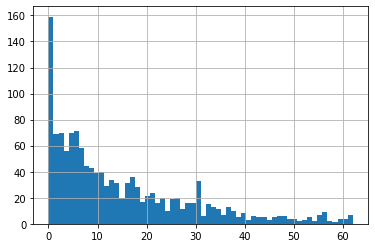

In [785]:
df_noout['total_cases'].hist(bins=60)

_Create a total cases attribute to choose the reliable datapoint and remove the biases like as we can see in above plot some datapoints near by 60 can be biased one_

[1. 2. 3. 4. 0.]


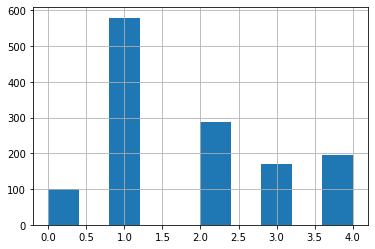

In [786]:
df_noout["total_cases_cat"]=np.ceil(df_noout["total_cases"]/10) 
df_noout["total_cases_cat"].where(df_noout["total_cases_cat"]<4,4.0,inplace=True)
df_noout["total_cases_cat"].hist()
print(df_noout["total_cases_cat"].unique())

_The data is divided into following category with some percentage, the same should be there for split_

In [787]:
df_noout["total_cases_cat"].value_counts()/len(df_noout) 

1.0    0.434685
2.0    0.215465
4.0    0.147147
3.0    0.127628
0.0    0.075075
Name: total_cases_cat, dtype: float64

_Now split the data into 80:20 split by using stratified split method so that both train and test can have equal percentage of all categories_

In [788]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=4,test_size=0.2,random_state=42) 
for train_index,test_index in split.split(df_noout,df_noout["total_cases_cat"]):
    train_set=df_noout.iloc[train_index]
    test_set=df_noout.iloc[test_index]
print(train_set["total_cases_cat"].value_counts()/len(train_set)) 
test_set["total_cases_cat"].value_counts()/len(test_set)

1.0    0.434742
2.0    0.215023
4.0    0.147418
3.0    0.127700
0.0    0.075117
Name: total_cases_cat, dtype: float64


1.0    0.434457
2.0    0.217228
4.0    0.146067
3.0    0.127341
0.0    0.074906
Name: total_cases_cat, dtype: float64

In [789]:
abc=pd.DataFrame.copy(train_set)
abc.head()

,city,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,re_an_dew_point_temp_k,...,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases,total_cases_cat
1076,iq,2003,0.200000,0.190286,0.158943,0.163629,47.97,296.680000,297.635714,295.941429,...,47.97,17.515714,6.242857,26.700000,7.500000,32.0,22.1,98.4,4,1.0
571,sj,2001,0.072800,0.058550,0.122729,0.113186,35.69,298.751429,298.835714,294.281429,...,35.69,15.630000,3.128571,27.200000,7.771429,33.3,22.8,20.6,6,1.0
459,sj,1999,0.129050,0.086000,0.123471,0.132500,23.90,295.938571,296.114286,290.634286,...,23.90,12.492857,2.714286,24.042857,6.900000,28.9,18.9,0.0,37,4.0
1336,iq,2008,0.129243,0.172957,0.126029,0.150657,96.05,298.017143,299.592857,295.900000,...,96.05,17.505714,9.014286,26.250000,7.800000,33.2,22.2,64.4,9,1.0
310,sj,1996,0.088933,0.122350,0.216214,0.227829,46.16,297.852857,298.092857,293.800000,...,46.16,15.185714,2.300000,26.128571,6.728571,32.2,21.1,8.9,11,2.0


_Encoding the categorical variable like city and year using label encoder,as it is the most efficient method, with one hot encoding and get dummies, it will create multiple column for each category_

In [790]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_set['year']=le.fit_transform(train_set['year'])
test_set['year']=le.transform(test_set['year'])
train_set['city']=le.fit_transform(train_set['city'])
test_set['city']=le.transform(test_set['city'])

C:\Users\18132\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\18132\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\18132\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

_Creating X and y for train and test dataset so that we can use it in our model_

In [791]:
X_train=train_set.drop(columns=['total_cases','total_cases_cat'])
X_test=test_set.drop(columns=['total_cases','total_cases_cat'])
y_train=train_set['total_cases']
y_test=test_set['total_cases']

_Did the scaling of all the columns of train and test except city and year as they are already done while encoding, train is fit transformed and test is only transformed as it should not learn from train dataset_

In [792]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train.iloc[:,2:22]=sc.fit_transform(X_train.iloc[:,2:22])
X_test.iloc[:,2:22]=sc.fit_transform(X_test.iloc[:,2:22])

_Converted them to numpy array, in order to use them in the model_

In [793]:
X_train_np=X_train.to_numpy()
X_test_np=X_test.to_numpy()
y_train_np=y_train.to_numpy()
y_test_np=y_test.to_numpy()

_Ran the Schocatic Gradient descent Regressor and used the default values in order to understand the errors in model_

In [794]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
sgd_reg = SGDRegressor(max_iter=1000, alpha=0.1)
sgd_reg.fit(X_train_np,y_train_np)

SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

_Used the root mean square metrics to find the errors in the model and compare the different model, used RMSE as directly interpretable in terms of measurement units, and so is a better measure of goodness of fit than a correlation coefficient and also as while finding avearge of error they are squared, so we use RMSE, since it has the same units as the quantity plotted on the vertical axis_

In [795]:
from math import sqrt
y_pred_tr=sgd_reg.predict(X_train_np)
print("Root Mean squared error train: %.2f" %sqrt(mean_squared_error (y_train_np, y_pred_tr)))

Root Mean squared error train: 12.55


In [796]:
from math import sqrt
y_pred=sgd_reg.predict(X_test_np)
print("Root Mean squared error test: %.2f" %sqrt(mean_squared_error (y_test_np, y_pred)))

Root Mean squared error test: 12.82


_Generated the learning curve by using the function defined below and see if there is much difference between train and test_

In [753]:
import numpy as np
def plot_learning_curves(model, X_train, y_train):
    train_errors,test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test_np)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test_np, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")


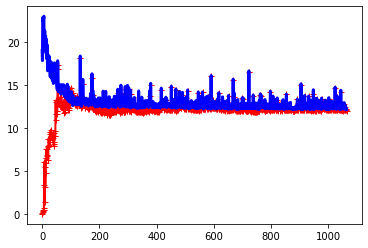

In [754]:
plot_learning_curves(sgd_reg,X_train_np,y_train_np)

_Used the grid search algorithm in order to find the best estimated parameter for the SGD regressor, where in I took some random values of max_iter i.e. number of steps , it will take to find global maximum and alpha i.e. learning rate, how fast the model will learn_

In [801]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'alpha':[0.00001,0.0001,0.001,0.01,0.1],'loss': ['squared_loss','huber'],'max_iter': [1000,3000,5000,7000]}]
gs = GridSearchCV(sgd_reg,param_grid,cv=5,scoring = 'neg_mean_squared_error')
gs.fit(X_train_np,y_train_np)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.1, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                          'loss': ['squared_loss', 'huber'],
                          'max_iter': [1000, 3000, 5000, 7000]}],
             pre_dispatch='2*n_jobs

_By using the below code, we can get to know which the best estimator og the grid earch and can use it in  SGD model_

In [802]:
gs.best_estimator_ 

SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

_Created one more SGD model by using grid search parameters and check the RMSE of predicted value of Y_

In [803]:
sgd_reg1 = SGDRegressor(max_iter=5000, alpha=0.1)
sgd_reg1.fit(X_train_np,y_train_np)
ytr1_pre=sgd_reg1.predict(X_train_np)
yte1_pre=sgd_reg1.predict(X_test_np)
print("Root Mean squared error train: %.2f" %sqrt(mean_squared_error (y_train_np, ytr1_pre)))
print("Root Mean squared error test: %.2f" %sqrt(mean_squared_error (y_test_np, yte1_pre)))

Root Mean squared error train: 12.11
Root Mean squared error test: 12.33


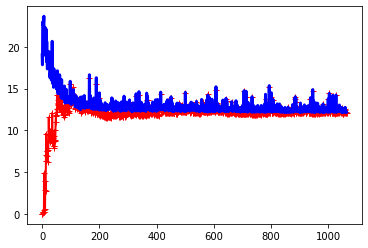

In [672]:
plot_learning_curves(sgd_reg1, X_train_np, y_train_np)

_Used the ramdomised search model, as it is more efficient as compared to grid and dont take all permutation combination, but take out random combination of values, the alpha is taken as some uniquely distributed values and the max_iter is also randomly_taken_

In [798]:
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha': sp_rand(),'loss': ['squared_loss','huber'],'max_iter': [1000,3000,5000,7000]}
rsearch = RandomizedSearchCV(sgd_reg, param_distributions=param_grid)
rsearch.fit(X_train_np,y_train_np)

C:\Users\18132\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.1, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=None,
                                          shuffle=True, tol=0.001,
                                          validation_fraction=0.1, verbose=0,
                                          warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object a

In [799]:
rsearch.best_estimator_ 

SGDRegressor(alpha=0.3293377380406173, average=False, early_stopping=False,
             epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

_The best estimator of above tuning hyperparameter method is used in SGD model and the RMSE has been calculated_

In [800]:
sgd_reg2=SGDRegressor(max_iter=5000,alpha=0.3293377380406173)
sgd_reg2.fit(X_train_np,y_train_np)
ytr2_pre=sgd_reg2.predict(X_train_np)
yte2_pre=sgd_reg2.predict(X_test_np)
print("Root Mean squared error train: %.2f" %sqrt(mean_squared_error (y_train_np, ytr2_pre)))
print("Root Mean squared error test: %.2f" %sqrt(mean_squared_error (y_test_np, yte2_pre)))

Root Mean squared error train: 12.16
Root Mean squared error test: 12.36


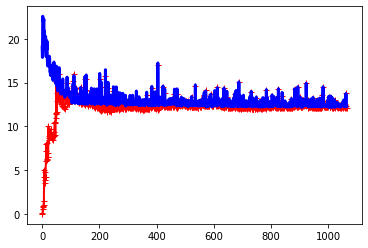

In [761]:
plot_learning_curves(sgd_reg2, X_train_np, y_train_np)

_The model created after tuning the hyper parameter using gridsearch is the best model as it has the lowest root mean squared error for train and test as 12.11 and 12.33 respectively.
So will convert the predicted value of y-train and test of the second model i.e. sgd_reg1_

In [804]:
df3 = pd.DataFrame(np.array([[sgd_reg,sqrt(mean_squared_error (y_train_np, y_pred_tr)) ,sqrt(mean_squared_error (y_test_np, y_pred)) ], [sgd_reg1, sqrt(mean_squared_error (y_train_np, ytr1_pre)),sqrt(mean_squared_error (y_test_np, yte1_pre)) ], [sgd_reg2, sqrt(mean_squared_error (y_train_np, ytr2_pre)),sqrt(mean_squared_error (y_test_np, yte2_pre)) ]]),
                   columns=['Model', 'RMSE_train', 'RMSE_test'])
df3.head()

,Model,RMSE_train,RMSE_test
0,"SGDRegressor(alpha=0.1, average=False, early_s...",12.5538,12.8227
1,"SGDRegressor(alpha=0.1, average=False, early_s...",12.1143,12.3318
2,"SGDRegressor(alpha=0.3293377380406173, average...",12.1592,12.3645


In [629]:
y_train=y_train.to_frame()
Predicted_train_y=pd.DataFrame(ytr1_pre,index=y_train.index,columns=y_train.columns)
Predicted_train_y=Predicted_train_y.rename(columns={'total_cases':'Predicted_total_cases'})
act_pre_tra_y=pd.concat([y_train,Predicted_train_y],axis=1)
total_train_data=pd.concat([X_train,act_pre_tra_y],axis=1)
total_train_data.head()

,city,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,re_an_dew_point_temp_k,...,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases,Predicted_total_cases
1076,0,13,0.455200,0.484823,-0.597872,-0.458901,0.047291,-1.436523,-1.217106,0.482017,...,0.047291,0.522191,0.318961,-0.357394,-0.332223,-0.234669,0.049233,1.121755,4,10.203092
571,1,11,-0.460530,-0.609928,-1.090036,-1.057068,-0.239113,0.109060,-0.263491,-0.613970,...,-0.239113,-0.705405,-0.542192,0.037570,-0.205636,0.421692,0.504610,-0.405704,6,15.774659
459,1,9,-0.055579,-0.381813,-1.079941,-0.828033,-0.514088,-1.989735,-2.426153,-3.021934,...,-0.514088,-2.747678,-0.656749,-2.456345,-0.612046,-1.799837,-2.032489,-0.810146,37,10.824132
1336,0,18,-0.054190,0.340819,-1.045188,-0.612721,1.168650,-0.438822,0.338194,0.454665,...,1.168650,0.515681,1.085308,-0.712862,-0.192311,0.371203,0.114287,0.454228,9,8.454813
310,1,6,-0.344384,-0.079737,0.180464,0.302402,0.005077,-0.561403,-0.853824,-0.931825,...,0.005077,-0.994634,-0.771306,-0.808781,-0.691996,-0.133690,-0.601305,-0.635411,11,17.030644


In [630]:
y_test=y_test.to_frame()
Predicted_test_y=pd.DataFrame(yte1_pre,index=y_test.index,columns=y_test.columns)
Predicted_test_y=Predicted_test_y.rename(columns={'total_cases':'Predicted_total_cases'})
act_pre_tes_y=pd.concat([y_test,Predicted_test_y],axis=1)
total_test_data=pd.concat([X_test,act_pre_tes_y],axis=1)
total_test_data.head()

,city,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,re_an_dew_point_temp_k,...,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases,Predicted_total_cases
1081,0,13,0.842738,0.653882,-0.188925,0.549067,0.126507,-1.367706,-1.274399,0.561542,...,0.126507,0.582278,-0.116753,0.491842,0.142544,0.863772,0.343895,0.350566,0,7.601336
320,1,6,0.158800,-0.114959,-0.361028,-0.489694,-0.640033,0.801057,0.454496,0.594434,...,-0.640033,0.542349,-0.813887,0.466125,-0.990126,0.190408,0.920975,-0.425177,6,23.251816
818,1,16,-2.270831,-1.942016,-1.425800,-1.277881,0.633971,-0.128107,-0.477752,-0.391447,...,0.633971,-0.474975,-0.762394,-1.762724,-0.799868,-0.867735,-0.810266,1.711380,19,17.839184
778,1,15,-1.793166,-2.034533,-0.783590,-1.051296,-0.254037,0.462790,0.194596,-0.070322,...,-0.254037,-0.158146,-0.497008,0.251812,-0.000784,0.190408,0.600375,-0.378162,1,15.114645
1062,0,12,1.072149,0.925859,1.635578,1.526885,0.094885,-0.185912,0.414946,0.861894,...,0.094885,0.929488,0.782392,1.076915,0.706342,0.623285,0.664495,0.272208,38,10.431995


In [831]:
df3=pd.read_csv("dengue_features_test.csv")
df3.shape

(416, 24)

In [832]:
df3=df3.fillna(method='ffill')

In [834]:
#df_test=df3.drop(columns=['week_start_date','weekofyear'])
df_test['year']=le.fit_transform(df_test['year'])
df_test['city']=le.fit_transform(df_test['city'])
df_test.head()

,city,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,0,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,1,0,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,1,0,-0.0015,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,1,0,-0.0015,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,1,0,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [835]:
df_test.shape

(416, 22)

In [836]:
df_test.iloc[:,2:22]=sc.fit_transform(df_test.iloc[:,2:22])
df_test_np=df_test.to_numpy()
dengue_feature_predict=sgd_reg1.predict(df_test_np)

In [838]:
df_test['predicted_total_cases']=dengue_feature_predict
df_test.head()

,city,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,predicted_total_cases
0,1,0,-0.818055,-1.011009,-1.328860,-1.199933,1.150400,-0.221428,-0.613830,-0.580092,...,-0.499201,1.150400,-0.641950,-0.561356,-0.679804,-0.317596,0.399792,-0.389715,1.194135,22.498454
1,1,0,-0.812519,-0.964960,-1.590935,-1.405393,-0.728707,-0.233126,-0.608350,-0.666350,...,-0.573999,-0.728707,-0.723550,-0.718996,-1.054143,-0.935567,-1.314781,-0.097815,0.009773,24.703393
2,1,0,-0.711032,-0.964960,-0.716238,-1.196358,-0.981948,0.435638,0.005401,-0.067231,...,-0.568573,-0.981948,-0.156931,-0.193532,0.466610,-0.017438,0.140009,0.252466,-0.896597,22.530502
3,1,0,-0.711032,-1.017858,-1.055202,-0.824759,-1.086090,0.595518,0.290357,-0.661662,...,-1.281284,-1.086090,-0.733636,-0.217784,0.571893,-0.641295,0.399792,1.186548,-0.974782,21.143225
4,1,0,-0.352443,-0.594912,-1.841486,-1.366228,-1.064465,0.656935,0.246517,-0.427265,...,-1.136339,-1.064465,-0.501670,-0.444137,0.209252,-0.305825,0.399792,0.544367,1.451857,24.336512


In [839]:
df_test.to_csv(r'C:\Users\18132\Desktop\My Docs\DSP\Ass_2\submission_format.csv', index = False)